In [22]:
import nbformat

# Load the notebook
with open('multipleMLModels.ipynb', 'r', encoding='utf-8') as f:
    notebook = nbformat.read(f, as_version=4)

# Save the notebook again
with open('multipleMLModels.ipynb', 'w', encoding='utf-8') as f:
    nbformat.write(notebook, f)

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix


In [23]:
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [24]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier())
])

In [25]:
param_grid = [
    {
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': [3, 5, 7, 9]
    },
    {
        'classifier':[LogisticRegression(max_iter=200)],
        'classifier__C': [0.1, 1, 10]
    },
    {
        'classifier':[SVC()],
        'classifier__kernel': ['linear', 'rbf'],
        'classifier__C': [0.1, 1, 10]
    }
]

In [26]:
strat_kfold = StratifiedKFold(n_splits=5, shuffle= True, random_state=42)



In [27]:
grid_search = GridSearchCV(pipeline, param_grid, cv=strat_kfold, scoring='accuracy')

In [28]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid=[{'classifier': [KNeighborsClassifier()],
                          'classifier__n_neighbors': [3, 5, 7, 9]},
                         {'classifier': [LogisticRegression(max_iter=200)],
                          'classifier__C': [0.1, 1, 10]},
                         {'classifier': [SVC()], 'classifier__C': [0.1, 1, 10],
                          'classifier__kernel': ['linear', 'rbf']}],
             scoring='accuracy')

In [29]:
print("Best Model:", grid_search.best_estimator_)
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression(C=10, max_iter=200))])
Best Parameters: {'classifier': LogisticRegression(max_iter=200), 'classifier__C': 10}
Best Cross-Validation Score: 0.9583333333333333


In [30]:
y_pred = grid_search.predict(X_test)
print("\nTest Set Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Test Set Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


In [31]:
import pandas as pd
import seaborn as sns
target_names = iris.target_names

# Create a DataFrame for easier plotting
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = [target_names[i] for i in y]

# Set the style of seaborn
sns.set(style="whitegrid")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a DataFrame for easier plotting
df_scaled = pd.DataFrame(X_scaled, columns=iris.feature_names)
df_scaled['species'] = [target_names[i] for i in y]

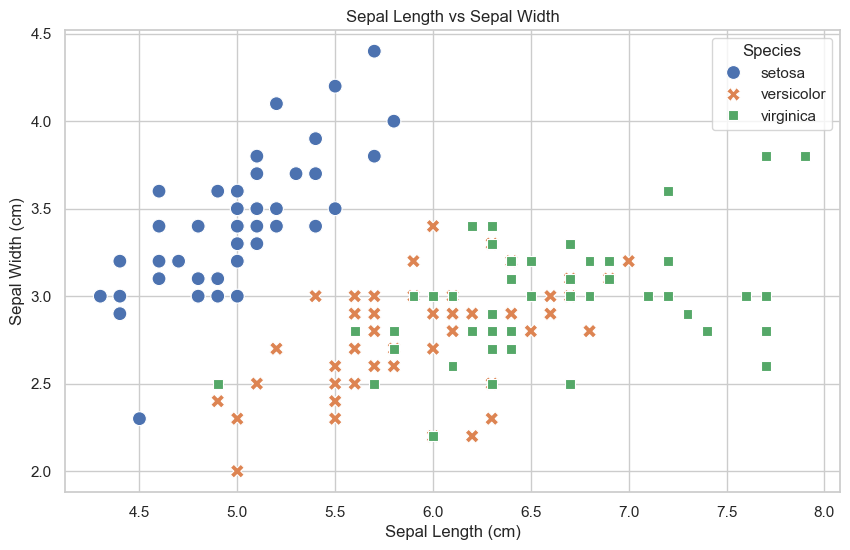

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='species', style='species', s=100)
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species')
plt.show()

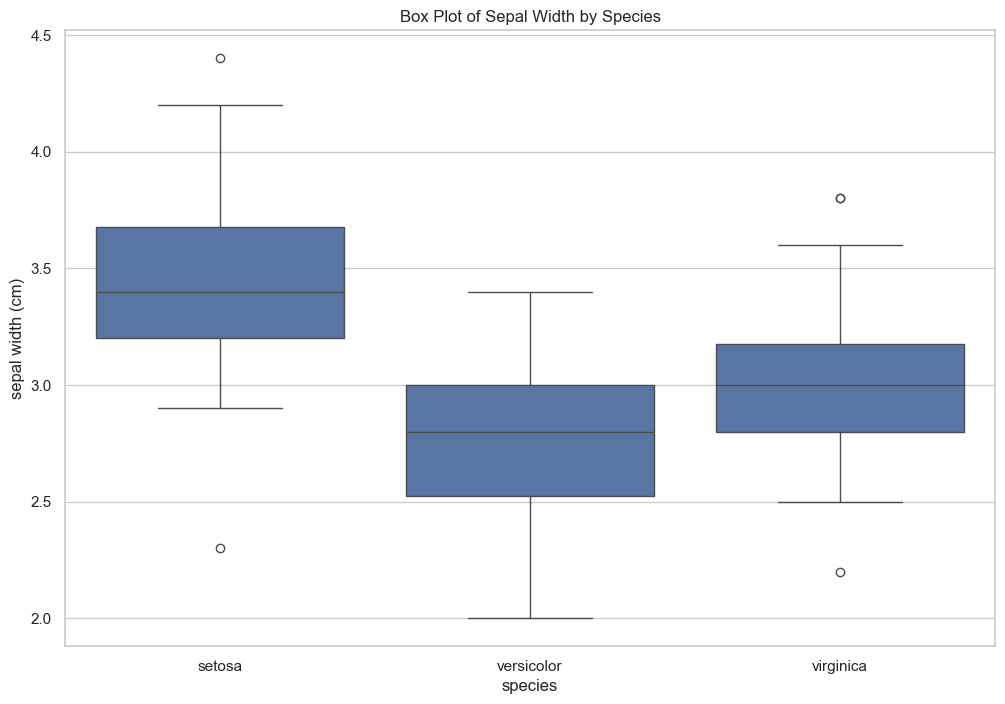

In [33]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='species', y='sepal width (cm)')
plt.title('Box Plot of Sepal Width by Species')
plt.show()